# Summary maps for comparison between global and regional dataset
A summary of the count of global datasets showing wetter conditions compared to regional datasets across sub-regions of the global land area, as defined in the IPCC's Sixth Assessment Report (AR6). Some sub-regions, including Greenland (GIC) and Central America are excluded from the count, as no regional datasets exist for these areas to our knowledge.


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import regionmask


In [2]:
##define IPCC Region
ipcc_subregions = {"NWN": 1,"NEN": 2, "WNA": 3, "CNA": 4, "ENA": 5, "NCA": 6, "SAH": 20,
    "WAF": 21,"CAF": 22, "NEAF": 23, "SEAF": 24, "ESAF": 26, "WSAF":25, "MDG": 27, "EAU": 41,
    "CAU": 40, "SAU": 42, "NAU": 39,"SEA": 38, "EAS": 35, "ECA": 33, "TIB": 34, "SAS": 37,
    "NWS": 9,"NSA": 10,"SAM": 12, "NES": 11, "SWS": 13, "SES": 14,"SSA":15, "NEU": 16,"WCE": 17,
    "GIC": 0, "EEU": 18, "WSB": 29, "ESB":30, "RFE": 31, "RAR": 28, "WCA": 32, "ARP": 36, 
    "NZ": 43, "SCA": 7,"CAR":8}
    

In [3]:
ar6_land=regionmask.defined_regions.ar6.land['NWS', 'NSA','SAM','NES','SES','SSA','SWS',  'NWN', 'NEN',"WNA",  "CNA", "ENA", "NCA", 
"SAH", "WAF", "CAF", "NEAF", "SEAF", "ESAF", "WSAF","MDG", "EAU","CAU","SAU", "NAU", "SEA", "EAS", "ECA", "TIB", "SAS",'MED',  "NEU",
    "WCE", "GIC", "EEU", "WSB",  "ESB", "RFE", "RAR",  "WCA", "ARP", "NZ", "SCA", "CAR"]

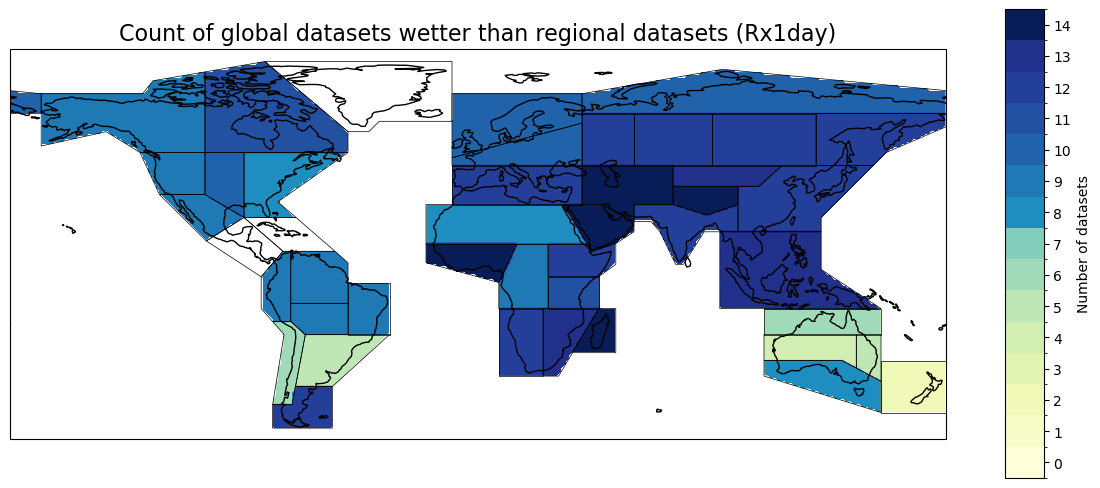

In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import regionmask
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap


# Load the IPCC land-sea mask dataset
ipcc_mask_ds = xr.open_dataset("/g/data/w40/pn3424/2024/Lisa/mask/land_sea_mask_combined_1degree.nc")

# Assuming the land-sea mask is a 2D array where 1 represents land and 0 represents sea
land_sea_mask = ipcc_mask_ds['sftlf']  # Replace with the actual variable name for land-sea mask

# Generate longitude and latitude arrays from the dataset
lon = ipcc_mask_ds['lon'].values  # Ensure you get values as numpy array
lat = ipcc_mask_ds['lat'].values  # Ensure you get values as numpy array

# Create a meshgrid of lon and lat
lon2d, lat2d = np.meshgrid(lon, lat)

# Generate AR6 region mask
ar6_mask = regionmask.defined_regions.ar6.land.mask(ipcc_mask_ds)

# Create some example 2D data to mask (e.g., temperature data)
data = np.random.rand(len(lat), len(lon))  # Adjust data dimensions based on lat/lon size

# Define a dictionary mapping AR6 region values to specific mask values - 
#number of global datasets thatare  wetter than regional dataset
region_mask_values = {
    0: np.nan, 1: 9, 2: 11, 3: 9, 4: 10, 5: 8, 6: 9, 7: np.nan, 8: np.nan, 9: 9, 
    10: 9, 11: 9, 12: 9, 13: 6, 14: 5, 15: 12, 16: 10, 17: 10, 18: 12, 19: 12, 
    20: 8, 21: 14, 22: 9, 23: 12, 24: 11, 25: 12, 26: 13, 27: 14, 28: 10, 
    29: 12, 30: 12, 31: 12, 32: 14, 33: 13, 34: 14, 35: 12, 36: 14, 37: 12, 
    38: 13, 39: 6, 40: 4, 41: 5, 42: 8, 43: 2
}

# Create a masked array by applying specific values to each AR6 region
masked_data = np.copy(data)  # Copy the original data
for region, mask_value in region_mask_values.items():
    masked_data[ar6_mask == region] = mask_value

# Create a mask for regions outside the AR6 land mask
outside_ar6_mask = np.isnan(ar6_mask)

# Define the colormap and normalization
#cmap = plt.get_cmap('YlGnBu', 15)  # Colormap with 15 distinct colors
#bounds = np.linspace(-0.5, 14.5, 16)

cmap=ListedColormap(["#ffffd9", "#f7fcc8", "#f0f9b7", "#e3f4b2", "#d3eeb3", "#bfe6b5","#a1dab8","#83cebb",
                     "#1d8ebf", "#1f79b5", "#2163ab", "#2351a2", "#243f99", "#20308b", "#142771", "#081d58"])
bounds = np.linspace(-0.5, 14.5, 16)
norm = colors.BoundaryNorm(bounds, cmap.N) 


# Start creating the plot with Cartopy
fig = plt.figure(figsize=(12,7))

# Set the projection using PlateCarree (for flat maps)
ax = plt.axes(projection=ccrs.PlateCarree())

contour_levels = np.linspace(-0.5, 14.5, 16)
contour = plt.contourf(lon2d, lat2d, masked_data, cmap=cmap, norm=norm, levels=contour_levels, transform=ccrs.PlateCarree())

# Plot the regions outside the AR6 land mask with white color
plt.contourf(lon2d, lat2d, outside_ar6_mask, levels=[0.5, 1], colors='white', transform=ccrs.PlateCarree())

# Plot AR6 region boundaries without labels
ar6_land = regionmask.defined_regions.ar6.land
ar6_land.plot_regions(ax=ax, line_kws=dict(linestyle='-', color='black', linewidth=0.5), add_label=False)

# Overlay the coastline from the land-sea mask by plotting where the mask changes from land to sea
plt.contour(lon2d, lat2d, land_sea_mask, levels=[0.5], colors='black', transform=ccrs.PlateCarree(), linewidths=1)

# Add Cartopy's coastlines (optional)
ax.coastlines()

# Set latitude limits for the plot to focus on 60°S to 90°N
ax.set_ylim(-60, 90)

# Add gridlines for better readability
#ax.gridlines(draw_labels=True)

# Add a colorbar for the masked data
cbar = plt.colorbar(contour, label='Number of datasets', shrink=0.7, aspect=12)
#ax.text(0.01, 0.05, 'b',transform=ax.transAxes, bbox=dict(facecolor='none',  edgecolor='black',boxstyle='square'), size=16)

cbar.set_ticks(range(15))  # Set ticks from 0 to 14
cbar.ax.set_yticklabels(range(15))

# Set the title
plt.title('Count of global datasets wetter than regional datasets (Rx1day)', size=16)

# Show the plot
plt.tight_layout()
plt.savefig("/g/data/w40/pn3424/2024/Lisa/Fig/Jan2025/Fig18_summary.png",dpi=300,bbox_inches='tight')
